In [24]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
from viz import evaluation_example1, evaluation_example2, evaluation_example3, evaluation_example4, evaluation_example5

Acquire and Prep

In [25]:
PER= pd.read_excel('PER.xlsx')

In [26]:
sal=pd.read_excel('salary.xls')

In [27]:
PER.describe()

,Rk,Age,MP,PER,G,GS,FG,FGA,2P,2PA,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1548.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1515.000000,1600.000000,1600.000000,1600.000000
mean,800.50000,27.003125,34.046563,21.500437,70.513125,64.007752,7.307437,14.872875,6.596938,12.883688,...,0.915062,2.489313,2.614688,19.694500,0.496286,0.514596,0.269328,0.519504,0.779236,0.570520
std,462.02453,3.787919,4.616245,2.696291,14.714964,22.112218,1.820741,3.907622,1.955866,3.847480,...,0.805091,0.758016,0.629852,4.977127,0.050086,0.046090,0.151233,0.042141,0.086822,0.037138
min,1.00000,19.000000,20.000000,18.400000,1.000000,0.000000,2.500000,4.200000,1.400000,2.900000,...,0.000000,0.000000,0.900000,6.500000,0.261000,0.250000,0.000000,0.304000,0.355000,0.433000
25%,400.75000,24.000000,31.500000,19.400000,66.000000,56.000000,6.000000,12.200000,5.200000,10.000000,...,0.300000,2.000000,2.100000,16.200000,0.461000,0.483000,0.189500,0.491750,0.738000,0.544000
50%,800.50000,27.000000,35.000000,20.700000,76.000000,74.000000,7.300000,15.000000,6.500000,12.900000,...,0.600000,2.500000,2.600000,19.600000,0.493000,0.508500,0.314000,0.513000,0.790000,0.567000
75%,1200.25000,29.000000,37.300000,22.900000,81.000000,80.000000,8.500000,17.600000,7.900000,15.525000,...,1.300000,3.000000,3.000000,22.900000,0.524250,0.539000,0.368500,0.545000,0.841000,0.593000
max,1600.00000,40.000000,43.700000,31.700000,85.000000,82.000000,13.400000,27.800000,13.200000,27.000000,...,4.600000,5.700000,4.500000,37.100000,0.714000,0.717000,1.000000,0.714000,1.000000,0.708000


In [28]:
PER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 33 columns):
Rk        1600 non-null int64
Player    1600 non-null object
Season    1600 non-null object
Age       1600 non-null int64
Tm        1600 non-null object
Lg        1600 non-null object
MP        1600 non-null float64
PER       1600 non-null float64
G         1600 non-null int64
GS        1548 non-null float64
FG        1600 non-null float64
FGA       1600 non-null float64
2P        1600 non-null float64
2PA       1600 non-null float64
3P        1600 non-null float64
3PA       1600 non-null float64
FT        1600 non-null float64
FTA       1600 non-null float64
ORB       1600 non-null float64
DRB       1600 non-null float64
TRB       1600 non-null float64
AST       1600 non-null float64
STL       1600 non-null float64
BLK       1600 non-null float64
TOV       1600 non-null float64
PF        1600 non-null float64
PTS       1600 non-null float64
FG%       1600 non-null float64
2P%    

In [29]:
df=pd.DataFrame(PER)

#### Got rid of all the players that did not play a sgnificant number of games in the season, 66 games means the player appeared in 80% of the season

In [33]:
df= df.loc[df['G'] >=66]

#### Clean Data for a Baseline model
Start with points, assists, rebounds to predict PER with a Linear Regreassion Model

In [38]:
base= df[['PTS', 'TRB', 'AST', 'PER']]

In [39]:
base.head()

,PTS,TRB,AST,PER
0,28.4,7.6,7.2,31.7
1,35.0,5.5,5.9,31.7
2,26.8,8.0,7.3,31.6
3,31.5,6.0,5.5,31.6
4,30.1,5.4,6.7,31.5


In [40]:
base= pd.DataFrame(base)


#### Split Data
I dont believe I need to scale the data

In [41]:
train, test = train_test_split(base, train_size = .80, random_state = 123)
X_train = train.drop(columns='PER')
y_train = train[['PER']]
X_test = test.drop(columns='PER')
y_test = test[['PER']]


train.head()

,PTS,TRB,AST,PER
1146,18.8,3.2,6.2,19.6
1190,17.9,7.7,1.4,19.5
625,19.2,4.6,8.3,21.6
835,14.9,10.6,0.8,20.6
1443,14.2,10.8,3.9,18.8


### Exploring data

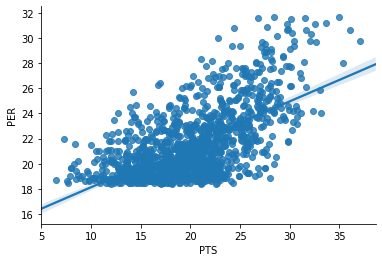

In [42]:
sns.regplot(x="PTS", y="PER", data=base);

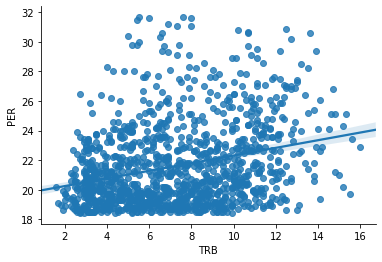

In [43]:
sns.regplot(x="TRB", y="PER", data=base)

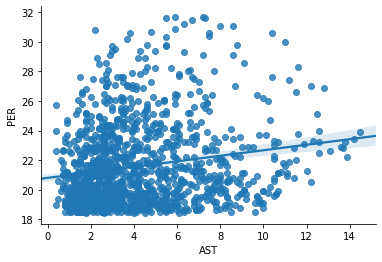

In [44]:
sns.regplot(x="AST", y="PER", data=base)

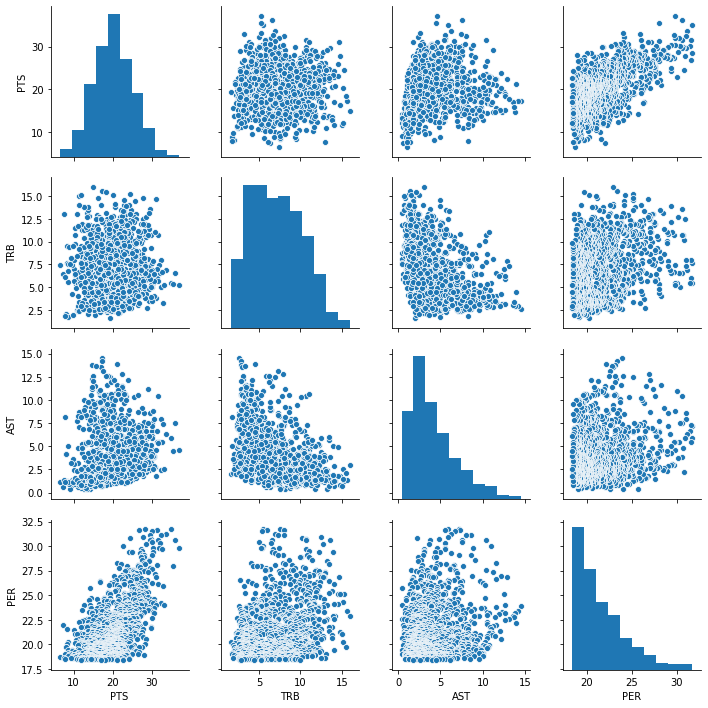

In [45]:
sns.pairplot(base)

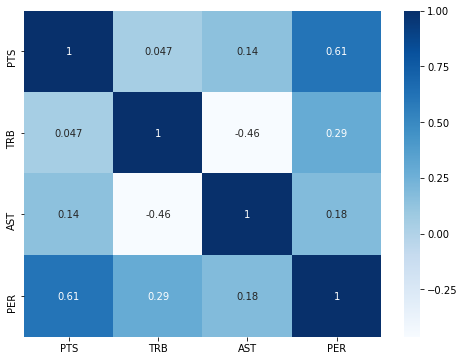

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)


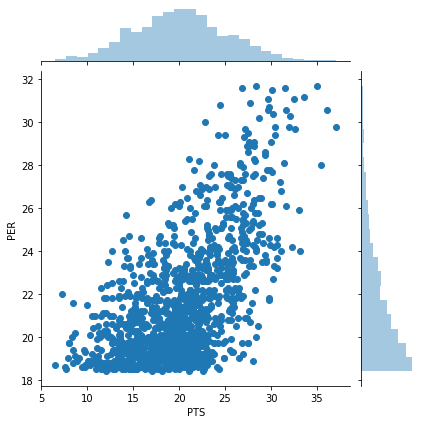

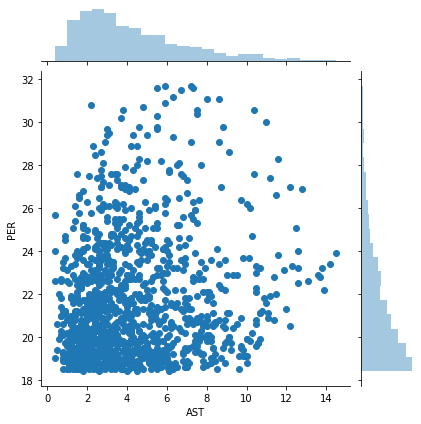

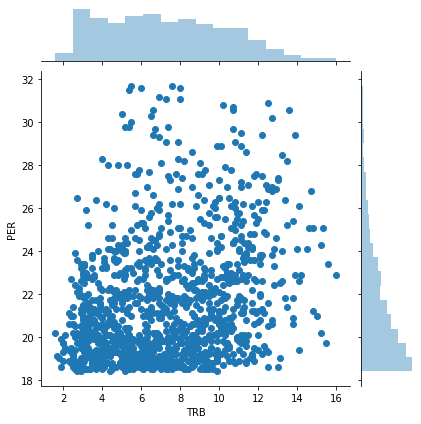

In [52]:
sns.jointplot(x='PTS',y='PER',data=base)
sns.jointplot(x='AST',y='PER',data=base)
sns.jointplot(x='TRB',y='PER',data=base)

#### Training and Testing Data

In [55]:
y= base['PER']
X= base[['PTS', 'TRB', 'AST']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Training the Model
 Now its time to train our model on our training data! Create the object

In [57]:
lm = LinearRegression()

In [60]:
##Train/fit lm on the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [0.30858279 0.33415861 0.27797836]


In [64]:
lm.fit(X_train, y_train)
print("Linear Model:", lm1)

lm_y_intercept = lm.intercept_
print("intercept: ", lm_y_intercept)

lm_coefficients = lm.coef_
print("coefficients: ", lm_coefficients)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  11.768362212185869
coefficients:  [0.30858279 0.33415861 0.27797836]


#### Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!
 Use lm.predict() to predict off the X_test set of the data.

In [65]:
predictions = lm.predict( X_test)

In [69]:
plt.scatter(x=)

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

In [70]:
mse_lm = mean_squared_error(y_train, y_pred_lm)
print("linear model\n  mean squared error: {:.3}".format(mse_lm)) 

r2_lm = r2_score(y_train, y_pred_lm)

NameError: name 'y_pred_lm' is not defined